## 基于机器学习的新冠肺炎新发病例预测

首先通过ARIMA模型对湖北省每日发病数据进行初步处理，对得到的结果进行特征工程后，使用机器学习方法滚动预测数天后湖北省的新增病例数，从而尝试预测疫情的发展。

---
## 步骤一：数据的探索与问题分析

### 1.1  明确分析任务，简单了解数据，并描述数据基本特征。

数据文件如下：
- .\provincedata\湖北.csv

In [2]:
# 导入依赖库
import pandas as pd
import numpy as np
from tqdm import tqdm  # 制作进度条
import matplotlib.pyplot as plt
%matplotlib inline
data=pd.read_csv('./provincedata/湖北.csv',encoding='gbk',index_col=0,parse_dates=True)
#查看数据的特征
print('数据集的特征：{}\n'.format(data.columns.values))
#查看数据的index
print('数据集的Index：{}\n'.format(data.index))
#查看数据的shape
print('数据集的形状：{}'.format(data.shape))

数据集的特征：['新增确诊病例' '新增治愈出院数' '新增死亡数' '核减' '治愈核减' '死亡核减' '扣除核减累计确诊人数' '累计治愈人数'
 '累计死亡人数' '累计确诊人数']

数据集的Index：DatetimeIndex(['2019-12-31', '2020-01-01', '2020-01-02', '2020-01-03',
               '2020-01-04', '2020-01-05', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-11',
               '2020-01-12', '2020-01-13', '2020-01-14', '2020-01-15',
               '2020-01-16', '2020-01-17', '2020-01-18', '2020-01-19',
               '2020-01-20', '2020-01-21', '2020-01-22', '2020-01-23',
               '2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
               '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
               '2020-02-01', '2020-02-02', '2020-02-03', '2020-02-04',
               '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-08',
               '2020-02-09', '2020-02-10', '2020-02-11', '2020-02-12',
               '2020-02-13', '2020-02-14', '2020-02-15', '2020-02-16',
               '2020-02-17', '2020-02-18'

### 1.2 编程练习
打印数据集的前5行数据

In [2]:
# TODO：打印data的前五行数据
data.head(5).T

公开时间,2019-12-31 00:00:00,2020-01-01 00:00:00,2020-01-02 00:00:00,2020-01-03 00:00:00,2020-01-04 00:00:00
新增确诊病例,0,0,0,0,0
新增治愈出院数,0,0,0,0,0
新增死亡数,0,0,0,0,0
核减,0,0,0,0,0
治愈核减,0,0,0,0,0
死亡核减,0,0,0,0,0
扣除核减累计确诊人数,0,0,0,0,0
累计治愈人数,0,0,0,0,0
累计死亡人数,0,0,0,0,0
累计确诊人数,0,0,0,0,0


查看数据集特征的的分布，对于describe善用转置可展示更多特征

In [3]:
# TODO：描述数据中特征的分布
data.describe()

,新增确诊病例,新增治愈出院数,新增死亡数,核减,治愈核减,死亡核减,扣除核减累计确诊人数,累计治愈人数,累计死亡人数,累计确诊人数
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,1016.779412,665.867647,45.514706,-21.088235,-3.941176,-1.602941,27106.073529,8100.617647,982.397059,27582.720588
std,1999.453536,893.981350,49.685426,128.537437,32.623992,13.095675,28900.704311,13303.105953,1123.845094,29513.185411
min,0.000000,0.000000,0.000000,-1043.000000,-269.000000,-108.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,1.750000,1.000000,0.000000,0.000000,0.000000,57.750000,18.000000,2.000000,57.750000
50%,344.500000,90.500000,31.000000,0.000000,0.000000,0.000000,12349.500000,345.500000,382.000000,12349.500000
75%,1665.000000,1309.250000,72.750000,0.000000,0.000000,0.000000,62614.750000,10699.750000,2057.750000,63853.750000
max,14840.000000,3203.000000,242.000000,0.000000,2.000000,0.000000,67707.000000,45011.000000,2986.000000,69141.000000


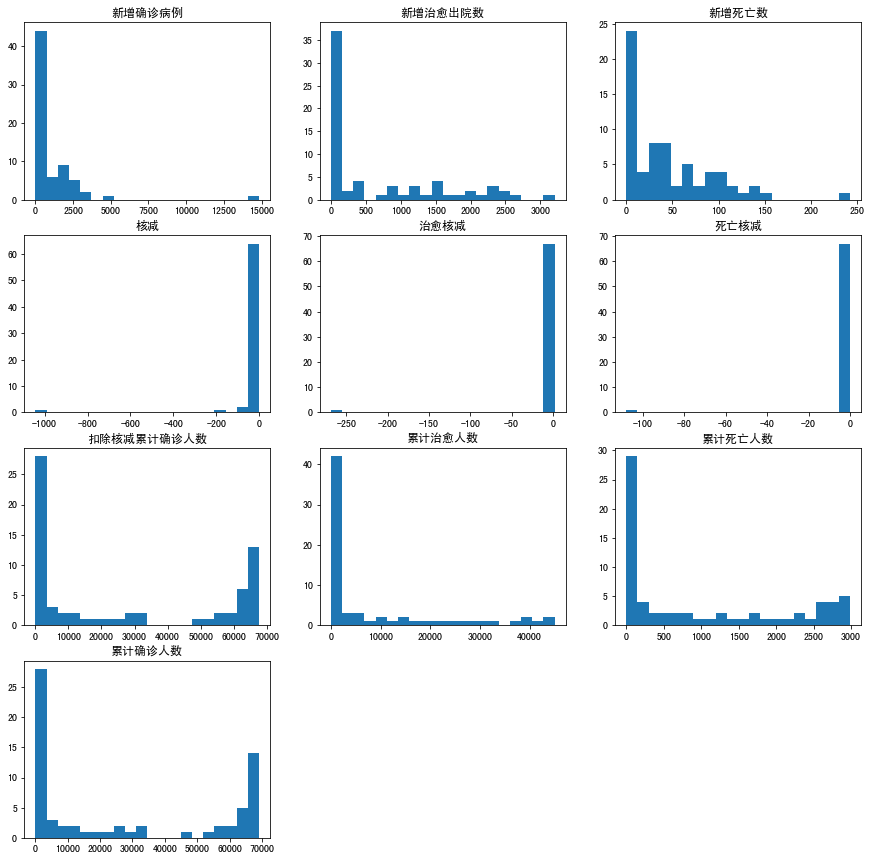

In [4]:
# TODO：画出特征分布的直方图
fig = plt.figure(figsize=(15,15))
for i in range(len(data.columns)): 
    axe = fig.add_subplot(4,3,i+1)   
    axe.hist(data.iloc[:,i],bins=20)
    plt.title(data.columns[i])
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.rcParams['axes.unicode_minus'] = False

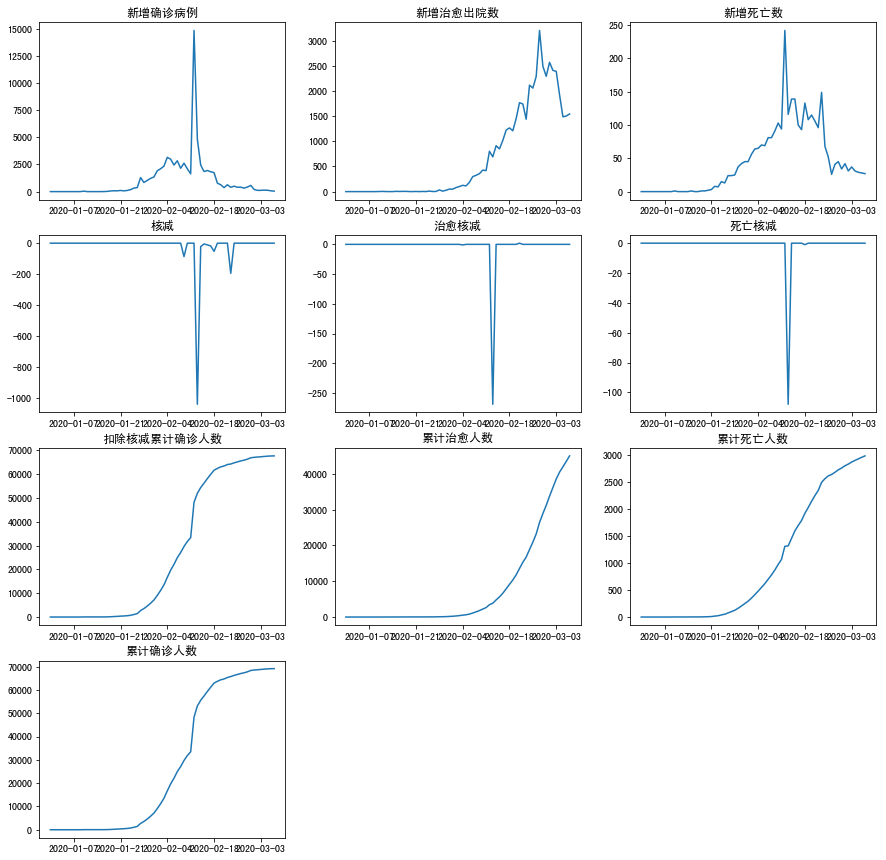

In [5]:
# TODO：画出特征分布的折线图
fig = plt.figure(figsize=(15,15))
for i in range(len(data.columns)): 
    axe = fig.add_subplot(4,3,i+1)   
    axe.plot(data.iloc[:,i])
    plt.title(data.columns[i])
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.rcParams['axes.unicode_minus'] = False

---
## 步骤二：清洗数据

在这一步中我们将开始清洗数据

通过观察数据我们发现：

- 数据需要查看是否存在缺失值。
- 数据存在一处异常情况，需要处理。

统计数据中的缺失值的数量
- 统计数据集有多少行有缺失
- 统计数据集有多少列有缺失

In [6]:
# TODO：统计数据集中有多少行/列有缺失
print('有',(data.isnull().sum(axis=1)>0).sum(),'行缺失')
print('有',(data.isnull().sum(axis=0)>0).sum(),'列缺失')

有 0 行缺失
有 0 列缺失


想办法处理2020年2月12日的异常值
- 这里将其简单替换为前后两日新发病例数的平均值

In [3]:
# TODO：将第43行的新增确诊病例替换为42行与44行的均值
data['新增确诊病例'].iloc[43]= np.mean(data['新增确诊病例'].iloc[[42,44]])

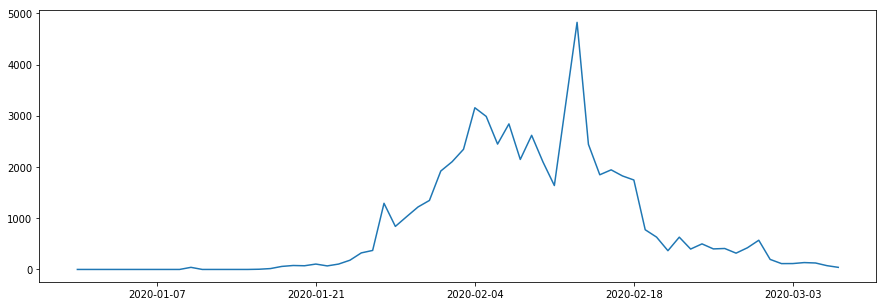

In [4]:
# TODO：将'新增确诊病例'提取出来赋值给dataana,并查看dataana的趋势
dataana = data[['新增确诊病例']]
fig = plt.figure(figsize=(15,5))
plt.plot(dataana)
plt.show()

---
## 步骤三：特征工程

- ARIMA
- 特征抽取
- 数据规整
- 特征过滤

通过**项目之前的思考**可以发现，我们需要使用ARIMA模型初步特征工程；对数据进行去量纲操作；进一步抽取可用的特征；以及降低样本的维度。

### 3.1 ARIMA模型
从上面我们可以看出数据为时间序列数据，对此我们可以使用ARIMA模型进行拟合，从而以其预测值作为新特征。<br>

**注意**：针对长期的时间序列数据（如股票价格），可以通过ARIMA模型初步预测，将其残差拟合机器学习模型，从而进一步修正ARIMA模型，这种方法更常用。<br>

我们首先对前12天的数据进行移动平均和一阶差分，再使用一阶差分的结果以AIC为标准自动定阶，构建ARIMA模型，并得到预测值。之后逐天纳入新数据，并取对新数据的预测作为新特征的值。


In [9]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
from statsmodels.tsa.arima_model import ARIMA
#函数1  移动平均+差分
def plot_data(Series_1):
    # 7天为单位进行移动平均
    rol_mean = Series_1.rolling(window=7).mean()
    # 一阶差分
    diff_1 = rol_mean.diff(1)
    # 填充缺失
    rol_mean.fillna(0,inplace=True)
    diff_1.fillna(0,inplace=True)
    return rol_mean,diff_1

In [10]:
#函数2  自动定阶
def arima_order_select_both(Series_1,p_max=4,q_max=4):
    # 搜索AR和MA的参数，以AIC为标准
    train_results = sm.tsa.arma_order_select_ic(Series_1, 
                                                ic=['aic'],
                                                max_ar=p_max,max_ma=q_max)
    return train_results.aic_min_order[0],train_results.aic_min_order[1]

In [11]:
#函数3  返回预测值
def arima_model(Series_1,rol_mean,prim_data,ij,order=(1,1,1)):
    # 初始化模型，待入自动定阶的参数
    model = ARIMA(Series_1, order=order,    )  
    # 拟合模型
    result_arima = model.fit(disp=-1,transparams=False, method='css')
    # 获得预测值
    predict_ts = result_arima.predict()
    # 一阶差分还原（还原模型中的差分）
    diff_shift_ts = Series_1.shift(1)
    diff_recover_1 = predict_ts.add(diff_shift_ts)
    # 再次一阶差分还原（还原建模前的差分）
    rol_shift_ts = rol_mean.shift(1)
    diff_recover = diff_recover_1.add(rol_shift_ts)
    # 移动平均还原
    rol_sum = prim_data.rolling(window=6).sum()
    rol_recover = diff_recover*7 - rol_sum.shift(1)
    # 对数还原
    log_recover = np.exp(rol_recover-1)
    log_recover.dropna(inplace=True)
    # 获得预测值
    r = log_recover
    # 获得初次模型预测值
    if ij==0:
        return r
    # 获得滚动预测值
    else:
        return r[-1] 

In [12]:
#函数4  生成ARIMA预测数据集
def arima_model_pred(Series_1,step=12,p_max=4,q_max=4):
    # 空列表储存结果
    arima_pred = []
    for ij in range(len(Series_1)-step+1):
        # 滚动获取数据，并取对数
        if ij+step<len(Series_1):
            dtf = np.log(Series_1[:ij+step-1]+1)
        else:
            dtf = np.log(Series_1[:]+1)
        # 获得移动平均结果和一阶差分结果，套用函数1
        rol_mean,diff_1 = plot_data(dtf)
        # 获得参数，套用函数2
        p,q = arima_order_select_both(diff_1,p_max,q_max)
        # 套用函数3，获得预测值，注意自动定阶可能不稳定，构建模型失败
        # 对失败的模型直接取上一次的预测值作为本次预测
        try:
            a_pred = arima_model(diff_1,rol_mean,dtf,ij,order=(p,1,q))
        except:
            a_pred = a_pred  
        # 获得初次模型预测值
        if ij==0:
            arima_pred.extend(a_pred)
            print('初次运行的12天数据得到',len(a_pred),'天预测')
        # 获得滚动预测值
        else:
            arima_pred.append(a_pred)
            print('第',ij,'次数据进行中')
    return arima_pred

In [13]:
# 滤去警告
import warnings
warnings.filterwarnings("ignore")
# 切出序列，并运行上述函数，得到新特征
data_s = dataana[:]['新增确诊病例']
data_arima_p = arima_model_pred(data_s)

初次运行的12天数据得到 5 天预测
第 1 次数据进行中
第 2 次数据进行中
第 3 次数据进行中
第 4 次数据进行中
第 5 次数据进行中
第 6 次数据进行中
第 7 次数据进行中
第 8 次数据进行中
第 9 次数据进行中
第 10 次数据进行中
第 11 次数据进行中
第 12 次数据进行中
第 13 次数据进行中
第 14 次数据进行中
第 15 次数据进行中
第 16 次数据进行中
第 17 次数据进行中
第 18 次数据进行中
第 19 次数据进行中
第 20 次数据进行中
第 21 次数据进行中
第 22 次数据进行中
第 23 次数据进行中
第 24 次数据进行中
第 25 次数据进行中
第 26 次数据进行中
第 27 次数据进行中
第 28 次数据进行中
第 29 次数据进行中
第 30 次数据进行中
第 31 次数据进行中
第 32 次数据进行中
第 33 次数据进行中
第 34 次数据进行中
第 35 次数据进行中
第 36 次数据进行中
第 37 次数据进行中
第 38 次数据进行中
第 39 次数据进行中
第 40 次数据进行中
第 41 次数据进行中
第 42 次数据进行中
第 43 次数据进行中
第 44 次数据进行中
第 45 次数据进行中
第 46 次数据进行中
第 47 次数据进行中
第 48 次数据进行中
第 49 次数据进行中
第 50 次数据进行中
第 51 次数据进行中
第 52 次数据进行中
第 53 次数据进行中
第 54 次数据进行中
第 55 次数据进行中
第 56 次数据进行中


### 保存data_arima_p

In [14]:
#使用pickle保存python对象
import pickle
data_arima_p_file = 'data_arima_p.data'
f = open(data_arima_p_file, 'wb')
pickle.dump(data_arima_p, f)
f.close()

### 加载data_arima_p

In [5]:
# 加载对象
import pickle
data_arima_p_file = 'data_arima_p.data'
f = open(data_arima_p_file, 'rb')
data_arima_p = pickle.load(f)
print(data_arima_p)
print('预测长度为：',len(data_arima_p))

[0.5346018293647116, 0.5346018293647116, 0.5346018293647116, 0.5346018293647116, 0.5346018293647115, 15.450936408046221, 0.36787943635030246, 0.3678794357276997, 0.3678794367903672, 0.36787943617070223, 0.40680954809074577, 73.49860794249835, 0.19793149607542587, 27.761356743569177, 35.37951660011757, 38.97063548679517, 46.83195304289587, 206.1460781849732, 335.25736487922035, 402.0565326142948, 242.65630314485304, 167.32199107602048, 428.815835519989, 307.6731394817966, 528.5679384279786, 916.3716759911383, 1229.3845010738892, 1024.041529394581, 2935.191986214921, 1009.8548501846184, 1169.1977210472855, 1433.4554141387318, 1243.7981753310396, 1519.1322310944072, 1164.8156595475405, 1070.7402396942543, 1178.0542671416558, 748.5484123680802, 740.5970946043072, 1467.8898381622453, 938.0899647369312, 883.8386814554286, 609.3786767565215, 494.14671993613433, 815.7579711720172, 815.7579711720172, 162.63016695065087, 97.48180877070891, 97.48180877070891, 97.48180877070891, 97.48180877070891,

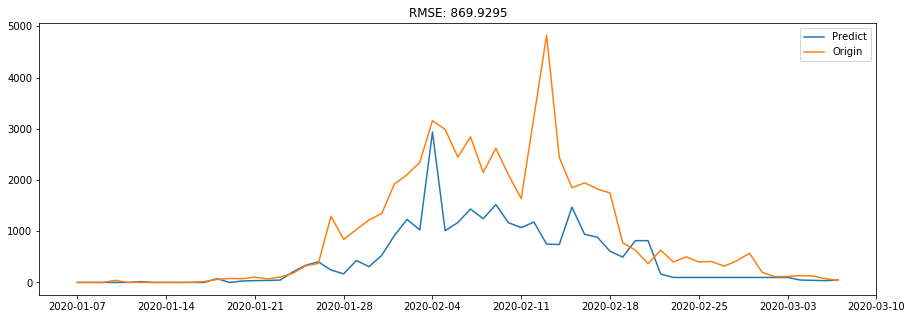

In [6]:
# TODO： 绘图查看'新增确诊病例'后61行和data_arima_p的趋势（68-7=61）
origin = dataana[-len(data_arima_p):]  
predict = pd.DataFrame(data_arima_p,index=origin.index)
fig = plt.figure(figsize=(15,5))
plt.plot(predict, label='Predict')
plt.plot(origin, label='Origin')
plt.legend(loc='best')
plt.title('RMSE: %.4f'% np.sqrt(sum((predict.values-origin.values)**2)/origin.size))
plt.show()

### 3.2 特征抽取
我们仍需进一步的特征抽取，以提升数据的质量。这里我们对ARIMA预测结果采取滚动求取均值、总和、标准差、最小值和最大值，并将所有特征前一时点的取值也作为新特征。<br>

In [7]:
#函数5  特征抽取
def feature_extraction(Series1,window=3): 
    # 生成空DataFrame
    df1 = pd.DataFrame()
    # 保留data_arima_p原值
    df1['feature0'] = Series1.values
    # 滚动求取3天的均值、和、标准差、最大值、最小值
    df1['feature1'] = Series1.rolling(window).mean().values
    df1['feature2'] = Series1.rolling(window).sum().values
    df1['feature3'] = Series1.rolling(window).std().values
    df1['feature4'] = Series1.rolling(window).min().values
    df1['feature5'] = Series1.rolling(window).max().values
    # 所有特征前一时点的取值也作为新特征
    df1['feature6'] = df1['feature0'].shift(1).values
    df1['feature7'] = df1['feature1'].shift(1).values
    df1['feature8'] = df1['feature2'].shift(1).values
    df1['feature9'] = df1['feature3'].shift(1).values
    df1['feature10'] = df1['feature4'].shift(1).values
    df1['feature11'] = df1['feature5'].shift(1).values
    df1['feature12'] = df1['feature6'].shift(1).values
    df1['feature13'] = df1['feature7'].shift(1).values
    df1['feature14'] = df1['feature8'].shift(1).values
    df1['feature15'] = df1['feature9'].shift(1).values
    df1['feature16'] = df1['feature10'].shift(1).values
    df1['feature17'] = df1['feature11'].shift(1).values
    # 以0填充缺失值
    df1.fillna(0,inplace=True)
    return df1

### 函数6，了解我们的数据是怎样的
函数6可以指定共6个参数<br>
- list1：要处理的列表，此处应为ARIMA的预测值列表，即**data_arima_p**
- origin_data：原数据集，此处应为最初导入的**data**
- gap：原数据集data和ARIMA的预测值列表data_arima_p的长度差值
- testdays：测试数据天数，示例中我们取20天
- lag：使用当前数据预测几天后的新病例数，示例中我们取1天
- window：滚动进行特征抽取时的窗口长度，示例中我们取3天 <br>

返回的是**特征**和**标签**，数据格式为列表，每个元素都是一个DataFrame，第i个元素分别对应第i个测试天数的特征及标签

In [8]:
#函数6  获取最终数据
def get_fe_data(list1,origin_data,gap,testdays,lag=1,window=3):
    # 生成空列表
    data_get = []
    label_get = []
    # 以0填充data_arima_p缺少的那些天，并转为Series
    list1_0 = list(np.zeros(gap))
    list1_0.extend(list1)
    list1_1 = pd.Series(list1_0)
    # 切出用于生成标签的列
    label_list = origin_data['新增确诊病例']
    # 对每个测试日进行循环
    for i in range(testdays):
        # 将第0日至第i个测试日的数据使用函数5进行特征抽取
        ssss_1 = feature_extraction(list1_1.iloc[:i-testdays],window)
        # 将第0日至第i个测试日的原始数据提出
        other_f = origin_data.iloc[:i-testdays,:]
        # 调整index，并合并抽取的数据和原始数据
        ssss_1.index = other_f.index
        data_i = pd.concat([ssss_1,other_f],axis=1)
        # 储存特征DataFrame至列表data_get
        data_get.append(data_i)
        
        # 向前滚动'新增确诊病例'以获取标签，lag即为滚动距离
        label_ = label_list.shift(-lag)
        # 将第0日至第i个测试日的标签提出
        label_i = label_.iloc[:i-testdays]
        # 储存标签Series至列表label_get
        label_get.append(label_i)
    return data_get,label_get

In [9]:
# 计算gap，并调用函数6，将特征和标签分别储存在features和lables中
gap = len(data)-len(data_arima_p)
features,labels= get_fe_data(data_arima_p,data,gap,20,1)

### 3.3 数据规整
- 借助循环进行训练集和测试集的划分，将每个数据集的最后一个样本作为测试，其余作为训练集
- 借助循环，选择一种方法对所有特征进行数据规整，注意训练集和测试集的处理
- 借助循环，将得到的数据集append至列表进行储存

In [10]:
# TODO；数据规整
from sklearn.preprocessing import StandardScaler
features_tr_temp = []
features_te_temp = []
labels_tr = []
labels_te = []
for i in range(len(features)):
    data_tr = features[i]
    X_train = data_tr.iloc[:-1,:]
    X_test = data_tr.iloc[-1:,:]
    y_train = labels[i].iloc[:-1]
    y_test = labels[i].iloc[-1:]
    
    stds = StandardScaler()
    X_train_std = stds.fit_transform(X_train)
    X_test_std = stds.transform(X_test)
    
    features_tr_temp.append(X_train_std)
    features_te_temp.append(X_test_std)
    labels_tr.append(y_train)
    labels_te.append(y_test)

### 3.4 特征过滤
相对于我们的样本量来说，我们的特征数量明显是过多的，因此需要减少维度的数量。<br>
我们可以采取特征选择和特征降维的方法进行特征过滤，减少特征的数量。<br>
使用你知道的方法进行特征过滤，参考代码展示PCA方法。
- 注意借助循环进行
- 自行选择保留的维度数目

In [11]:
# 从上述画图可将n_compolents设为6
from sklearn.decomposition import PCA
features_tr = []
features_te = []

for i in range(len(features)):
    pca = PCA(6,random_state=0)
    X_train_pca = pca.fit_transform(features_tr_temp[i])
    X_test_pca = pca.transform(features_te_temp[i])
    
    features_tr.append(X_train_pca)
    features_te.append(X_test_pca)

---
## 步骤四：选择模型进行交叉验证和网格搜索

选择合适的模型以及评估方式，使用交叉验证和网格搜索建立模型，并选择合适的参数,打印出交叉验证的结果。

- 注意在每个循环中建立新的模型，并预测其在测试集上的表现。
- 注意在循环中使用GridSearchCV进行调参。
- 注意在循环中保存测试集的预测值。

Fitting 3 folds for each of 10 candidates, totalling 30 fits
最好的参数为:{'n_estimators': 10}
最好的MSE值为:1707595.3038931566
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.7s finished


最好的参数为:{'n_estimators': 10}
最好的MSE值为:1690677.8039859037
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.7s finished


最好的参数为:{'n_estimators': 10}
最好的MSE值为:1661147.8923708657
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.7s finished


最好的参数为:{'n_estimators': 10}
最好的MSE值为:1610745.012925591
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.7s finished


最好的参数为:{'n_estimators': 10}
最好的MSE值为:1673410.6810229865
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.7s finished


最好的参数为:{'n_estimators': 10}
最好的MSE值为:1875680.0569322815
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.9s finished


最好的参数为:{'n_estimators': 10}
最好的MSE值为:1818617.4563788013
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.3s finished


最好的参数为:{'n_estimators': 10}
最好的MSE值为:1718765.876012252
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.3s finished


最好的参数为:{'n_estimators': 10}
最好的MSE值为:1408113.6157493887
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.1s finished


最好的参数为:{'n_estimators': 10}
最好的MSE值为:1217744.1462388665
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.1s finished


最好的参数为:{'n_estimators': 10}
最好的MSE值为:1039697.5499372698
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.8s finished


最好的参数为:{'n_estimators': 10}
最好的MSE值为:1130800.9940266316
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.8s finished


最好的参数为:{'n_estimators': 10}
最好的MSE值为:1162690.243585489
Fitting 3 folds for each of 10 candidates, totalling 30 fits
最好的参数为:{'n_estimators': 10}
最好的MSE值为:1198720.2663463687
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.1s finished


最好的参数为:{'n_estimators': 10}
最好的MSE值为:1307591.0411190172
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.3s finished


最好的参数为:{'n_estimators': 10}
最好的MSE值为:1369147.3937535028
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.9s finished


最好的参数为:{'n_estimators': 10}
最好的MSE值为:1263346.014671204
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.7s finished


最好的参数为:{'n_estimators': 90}
最好的MSE值为:1661764.2369781025
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.1s finished


最好的参数为:{'n_estimators': 100}
最好的MSE值为:1932837.9455021634
Fitting 3 folds for each of 10 candidates, totalling 30 fits
最好的参数为:{'n_estimators': 100}
最好的MSE值为:1783763.7284379972


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.8s finished


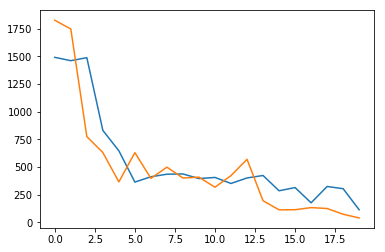

In [12]:
# TODO：模型选择、交叉验证、网格搜索
# GBDT模型
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import make_scorer, mean_squared_error
labels_true = []
param = {'n_estimators':range(10, 101, 10)}
for i in range(len(features_tr)):
    reg = GradientBoostingRegressor(loss = 'lad',learning_rate=0.1,random_state=0)
    grid = GridSearchCV(estimator = reg, param_grid = param, scoring = make_scorer(mean_squared_error),
                       n_jobs = -1, cv = 3, verbose = 1)
    grid.fit(features_tr[i], labels_tr[i])
    pred = grid.predict(features_te[i])
    labels_true.append(pred)
    print('最好的参数为:{}'.format(grid.best_params_))
    print('最好的MSE值为:{}'.format(grid.best_score_))
plt.plot(labels_true)
plt.plot(labels_te)

Fitting 3 folds for each of 90 candidates, totalling 270 fits
最好的参数为:{'max_depth': 1, 'min_samples_split': 2}
最好的MSE值为:1487722.722726728
Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    2.0s finished


最好的参数为:{'max_depth': 1, 'min_samples_split': 2}
最好的MSE值为:1289463.1892116421
Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    2.2s finished


最好的参数为:{'max_depth': 3, 'min_samples_split': 2}
最好的MSE值为:1123551.5716383907
Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    2.2s finished


最好的参数为:{'max_depth': 1, 'min_samples_split': 2}
最好的MSE值为:1114849.592156218
Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    2.2s finished


最好的参数为:{'max_depth': 1, 'min_samples_split': 2}
最好的MSE值为:1228461.2296256241
Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    2.3s finished


最好的参数为:{'max_depth': 1, 'min_samples_split': 2}
最好的MSE值为:1126040.5963909663
Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Done 212 tasks      | elapsed:    3.0s


最好的参数为:{'max_depth': 1, 'min_samples_split': 2}
最好的MSE值为:1151830.7611221904
Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    3.6s finished


最好的参数为:{'max_depth': 6, 'min_samples_split': 5}
最好的MSE值为:1098975.6060573538
Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    3.1s finished


最好的参数为:{'max_depth': 5, 'min_samples_split': 8}
最好的MSE值为:899934.8454572068
Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    2.5s finished


最好的参数为:{'max_depth': 3, 'min_samples_split': 7}
最好的MSE值为:883450.3562930728
Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    2.5s finished


最好的参数为:{'max_depth': 1, 'min_samples_split': 2}
最好的MSE值为:857316.1915302619
Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    2.8s finished


最好的参数为:{'max_depth': 1, 'min_samples_split': 2}
最好的MSE值为:1203606.8815744123
Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    2.5s finished


最好的参数为:{'max_depth': 1, 'min_samples_split': 2}
最好的MSE值为:1347443.1068901562
Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    2.6s finished


最好的参数为:{'max_depth': 1, 'min_samples_split': 2}
最好的MSE值为:1216183.2259931827
Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    2.4s finished


最好的参数为:{'max_depth': 1, 'min_samples_split': 2}
最好的MSE值为:1359325.6458655768
Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    2.3s finished


最好的参数为:{'max_depth': 1, 'min_samples_split': 2}
最好的MSE值为:1432672.7759593725
Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    2.6s finished


最好的参数为:{'max_depth': 1, 'min_samples_split': 2}
最好的MSE值为:1336490.1386435903
Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    3.0s finished


最好的参数为:{'max_depth': 1, 'min_samples_split': 2}
最好的MSE值为:1615566.1315803754
Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    2.7s finished


最好的参数为:{'max_depth': 1, 'min_samples_split': 2}
最好的MSE值为:1721615.18709193
Fitting 3 folds for each of 90 candidates, totalling 270 fits
最好的参数为:{'max_depth': 1, 'min_samples_split': 2}
最好的MSE值为:1537454.9867505967


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    3.3s finished


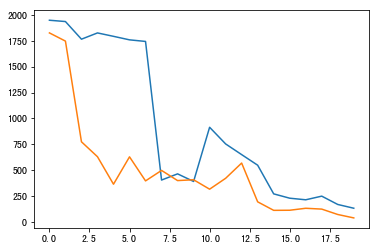

In [17]:
labels_true = []
param = {'max_depth':range(1,11,1), 'min_samples_split':range(2,11,1)}
for i in range(len(features_tr)):
    reg = GradientBoostingRegressor(loss = 'lad',learning_rate=0.1,n_estimators = 20,random_state=0)
    grid = GridSearchCV(estimator = reg, param_grid = param, scoring = make_scorer(mean_squared_error),
                       n_jobs = -1, cv = 3, verbose = 1)
    grid.fit(features_tr[i], labels_tr[i])
    pred = grid.predict(features_te[i])
    labels_true.append(pred)
    print('最好的参数为:{}'.format(grid.best_params_))
    print('最好的MSE值为:{}'.format(grid.best_score_))

plt.plot(labels_true)
plt.plot(labels_te)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
最好的参数为:{'max_leaf_nodes': 6}
最好的MSE值为:1317372.7957931666
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.2s finished


最好的参数为:{'max_leaf_nodes': 6}
最好的MSE值为:1260064.1753984469
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.2s finished


最好的参数为:{'max_leaf_nodes': 5}
最好的MSE值为:1121844.9533354735
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.2s finished


最好的参数为:{'max_leaf_nodes': 5}
最好的MSE值为:1043662.673923491
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.2s finished


最好的参数为:{'max_leaf_nodes': 6}
最好的MSE值为:991746.3826852068
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.2s finished


最好的参数为:{'max_leaf_nodes': 5}
最好的MSE值为:1161818.3353731951
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.2s finished


最好的参数为:{'max_leaf_nodes': 6}
最好的MSE值为:1129269.3331625406
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.2s finished


最好的参数为:{'max_leaf_nodes': 5}
最好的MSE值为:1073134.1647371326
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.4s finished


最好的参数为:{'max_leaf_nodes': 7}
最好的MSE值为:852698.4873073144
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.3s finished


最好的参数为:{'max_leaf_nodes': 6}
最好的MSE值为:852132.6270437222
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.4s finished


最好的参数为:{'max_leaf_nodes': 6}
最好的MSE值为:658359.2090179889
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.2s finished


最好的参数为:{'max_leaf_nodes': 5}
最好的MSE值为:888342.5359197855
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.2s finished


最好的参数为:{'max_leaf_nodes': 7}
最好的MSE值为:860027.0173756283
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.3s finished


最好的参数为:{'max_leaf_nodes': 6}
最好的MSE值为:766340.2132523482
Fitting 3 folds for each of 6 candidates, totalling 18 fits
最好的参数为:{'max_leaf_nodes': 5}
最好的MSE值为:858806.2025275978
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.3s finished


最好的参数为:{'max_leaf_nodes': 6}
最好的MSE值为:986260.5223520433
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.5s finished


最好的参数为:{'max_leaf_nodes': 5}
最好的MSE值为:975217.6792479262
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.3s finished


最好的参数为:{'max_leaf_nodes': 7}
最好的MSE值为:1253403.5712268646
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.2s finished


最好的参数为:{'max_leaf_nodes': 5}
最好的MSE值为:1385320.3602343972
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.3s finished


最好的参数为:{'max_leaf_nodes': 5}
最好的MSE值为:1306486.9712039272


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.2s finished


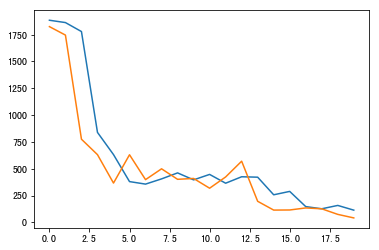

In [18]:
labels_true = []
param = {'max_leaf_nodes':range(5,11,1)}
for i in range(len(features_tr)):
    reg = GradientBoostingRegressor(loss = 'lad',learning_rate=0.1,n_estimators = 20,
                                    max_depth = 2,min_samples_split = 5,random_state=0)
    grid = GridSearchCV(estimator = reg, param_grid = param, scoring = make_scorer(mean_squared_error),
                       n_jobs = -1, cv = 3, verbose = 1)
    grid.fit(features_tr[i], labels_tr[i])
    pred = grid.predict(features_te[i])
    labels_true.append(pred)
    print('最好的参数为:{}'.format(grid.best_params_))
    print('最好的MSE值为:{}'.format(grid.best_score_))

plt.plot(labels_true)
plt.plot(labels_te)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='lad', max_depth=2, max_features=None,
             max_leaf_nodes=8, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=5, min_weight_fraction_leaf=0.0,
             n_estimators=20, presort='auto', random_state=0,
             subsample=1.0, verbose=0, warm_start=False)


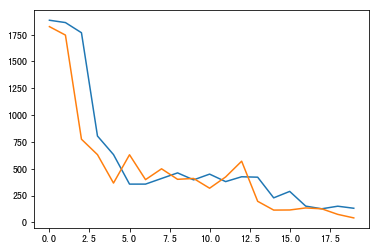

In [20]:
labels_true = []
for i in range(len(features_tr)):
    reg = GradientBoostingRegressor(loss = 'lad',learning_rate=0.1,n_estimators = 20,
                                    max_depth = 2,min_samples_split = 5, max_leaf_nodes = 8,random_state=0)
    
    reg.fit(features_tr[i], labels_tr[i])
    pred = reg.predict(features_te[i])
    labels_true.append(pred)

plt.plot(labels_true)
plt.plot(labels_te)
print(reg)

注意模型评价时，应把上述循环中保存的预测值和对应日期的原始‘新增确诊病例’比较。

In [21]:
# TODO：模型评价
from sklearn.metrics import r2_score
print('测试集上的R方是:{}'.format(r2_score(labels_te, labels_true)))

测试集上的R方是:0.7061147741846057


Fitting 5 folds for each of 1 candidates, totalling 5 fits
最好的参数为:{'min_samples_leaf': 1}
最好的R2值为:549022.5088743943
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


最好的参数为:{'min_samples_leaf': 1}
最好的R2值为:599372.7160865845
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


最好的参数为:{'min_samples_leaf': 1}
最好的R2值为:674950.266338938
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


最好的参数为:{'min_samples_leaf': 1}
最好的R2值为:698987.7309181029
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


最好的参数为:{'min_samples_leaf': 1}
最好的R2值为:861848.0999546705
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


最好的参数为:{'min_samples_leaf': 1}
最好的R2值为:761721.3811916374
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


最好的参数为:{'min_samples_leaf': 1}
最好的R2值为:709128.247306824
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


最好的参数为:{'min_samples_leaf': 1}
最好的R2值为:683296.975507113
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


最好的参数为:{'min_samples_leaf': 1}
最好的R2值为:822629.1158826879
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


最好的参数为:{'min_samples_leaf': 1}
最好的R2值为:1097941.5719857642
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


最好的参数为:{'min_samples_leaf': 1}
最好的R2值为:1180473.4132273518
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


最好的参数为:{'min_samples_leaf': 1}
最好的R2值为:1018717.5890416718
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


最好的参数为:{'min_samples_leaf': 1}
最好的R2值为:1134635.4442309665
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


最好的参数为:{'min_samples_leaf': 1}
最好的R2值为:1034370.4519990536
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


最好的参数为:{'min_samples_leaf': 1}
最好的R2值为:1000181.9451692756
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


最好的参数为:{'min_samples_leaf': 1}
最好的R2值为:899101.5861654757
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


最好的参数为:{'min_samples_leaf': 1}
最好的R2值为:842995.2285014486
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


最好的参数为:{'min_samples_leaf': 1}
最好的R2值为:825853.6404996872
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


最好的参数为:{'min_samples_leaf': 1}
最好的R2值为:850646.2419251754
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


最好的参数为:{'min_samples_leaf': 1}
最好的R2值为:728810.4591109111


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


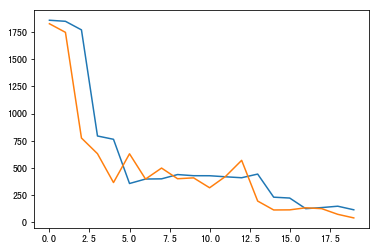

In [24]:
# 还可以继续优化参数，给不同特征赋予不同的权重，还有min_samples_leaf可以进行调整
labels_true = []
param = {'min_samples_leaf':range(1,2,1)}
for i in range(len(features_tr)):
    reg = GradientBoostingRegressor(loss = 'lad',learning_rate=0.1,n_estimators = 20, max_depth = 3
                                    ,min_samples_split = 5, max_leaf_nodes = 7)
    grid = GridSearchCV(estimator = reg, param_grid = param, scoring = make_scorer(mean_squared_error),
                       n_jobs = -1, cv = 5, verbose = 1)
    grid.fit(features_tr[i], labels_tr[i])
    pred = grid.predict(features_te[i])
    labels_true.append(pred)
    print('最好的参数为:{}'.format(grid.best_params_))
    print('最好的R2值为:{}'.format(grid.best_score_))

plt.plot(labels_true)
plt.plot(labels_te)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='lad', max_depth=3, max_features=None,
             max_leaf_nodes=7, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=5, min_weight_fraction_leaf=0.0,
             n_estimators=20, presort='auto', random_state=0,
             subsample=1.0, verbose=0, warm_start=False)


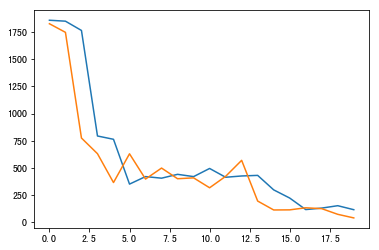

In [31]:
labels_true = []
for i in range(len(features_tr)):
    reg = GradientBoostingRegressor(loss = 'lad',learning_rate=0.1,n_estimators = 20,
                                    max_depth = 3, min_samples_split = 5, max_leaf_nodes = 7, min_samples_leaf = 1,random_state=0)
    
    reg.fit(features_tr[i], labels_tr[i])
    pred = reg.predict(features_te[i])
    labels_true.append(pred)

plt.plot(labels_true)
plt.plot(labels_te)
print(reg)

In [30]:
# TODO：模型评价
from sklearn.metrics import r2_score
print('测试集上的R方是:{}'.format(r2_score(labels_te, labels_true)))

测试集上的R方是:0.6871734999856164


Fitting 3 folds for each of 9 candidates, totalling 27 fits
最好的参数为:{'max_depth': 5}
最好的MSE值为:1613986.3002364065
Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    0.1s finished


最好的参数为:{'max_depth': 5}
最好的MSE值为:1333777.60125
Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    0.1s finished


最好的参数为:{'max_depth': 4}
最好的MSE值为:1260273.4902998237
Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    0.1s finished


最好的参数为:{'max_depth': 7}
最好的MSE值为:1268113.485
Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    0.1s finished


最好的参数为:{'max_depth': 7}
最好的MSE值为:1250014.0857843137
Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    0.1s finished


最好的参数为:{'max_depth': 3}
最好的MSE值为:1558002.305579585
Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    0.1s finished


最好的参数为:{'max_depth': 5}
最好的MSE值为:1389756.9040880504
Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    0.1s finished


最好的参数为:{'max_depth': 6}
最好的MSE值为:1276784.6944444445
Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    0.1s finished


最好的参数为:{'max_depth': 9}
最好的MSE值为:1539885.9318181819
Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    0.1s finished


最好的参数为:{'max_depth': 2}
最好的MSE值为:1571623.9784281454
Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    0.1s finished


最好的参数为:{'max_depth': 4}
最好的MSE值为:1563259.8595126704
Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    0.1s finished


最好的参数为:{'max_depth': 2}
最好的MSE值为:1304886.6972408125
Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    0.1s finished


最好的参数为:{'max_depth': 2}
最好的MSE值为:1345990.7159210804
Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    0.1s finished


最好的参数为:{'max_depth': 2}
最好的MSE值为:1300733.257905801
Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    0.1s finished


最好的参数为:{'max_depth': 7}
最好的MSE值为:1127964.8729508198
Fitting 3 folds for each of 9 candidates, totalling 27 fits
最好的参数为:{'max_depth': 7}
最好的MSE值为:1210379.8548387096
Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    0.1s finished


最好的参数为:{'max_depth': 3}
最好的MSE值为:965573.5475724868
Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    0.1s finished


最好的参数为:{'max_depth': 7}
最好的MSE值为:2221083.73046875
Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    0.1s finished


最好的参数为:{'max_depth': 8}
最好的MSE值为:3318899.2346153846
Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    0.1s finished


最好的参数为:{'max_depth': 8}
最好的MSE值为:3269145.034090909


[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    0.1s finished


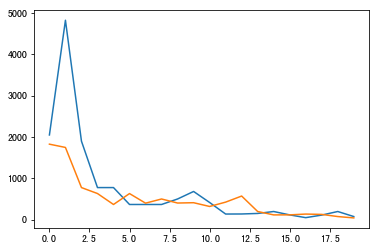

In [42]:
# 决策树模型
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer, mean_squared_error
labels_true = []
param = {'max_depth':range(2, 11, 1)}
for i in range(len(features_tr)):
    reg = DecisionTreeRegressor(random_state=0)
    grid = GridSearchCV(estimator = reg, param_grid = param, scoring = make_scorer(mean_squared_error),
                       n_jobs = -1, cv = 3, verbose = 1)
    grid.fit(features_tr[i], labels_tr[i])
    pred = grid.predict(features_te[i])
    labels_true.append(pred)
    print('最好的参数为:{}'.format(grid.best_params_))
    print('最好的MSE值为:{}'.format(grid.best_score_))
plt.plot(labels_true)
plt.plot(labels_te)

Fitting 3 folds for each of 90 candidates, totalling 270 fits
最好的参数为:{'max_leaf_nodes': 11, 'min_samples_leaf': 3}
最好的MSE值为:1786697.080969267
Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.2s finished


最好的参数为:{'max_leaf_nodes': 11, 'min_samples_leaf': 8}
最好的MSE值为:1558049.850131655
Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.2s finished


最好的参数为:{'max_leaf_nodes': 11, 'min_samples_leaf': 9}
最好的MSE值为:1537484.3185906857
Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.3s finished


最好的参数为:{'max_leaf_nodes': 11, 'min_samples_leaf': 10}
最好的MSE值为:1508157.199192408
Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.2s finished


最好的参数为:{'max_leaf_nodes': 11, 'min_samples_leaf': 10}
最好的MSE值为:1485152.22855941
Fitting 3 folds for each of 90 candidates, totalling 270 fits
最好的参数为:{'max_leaf_nodes': 11, 'min_samples_leaf': 9}
最好的MSE值为:1597239.6447316224
Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.2s finished


最好的参数为:{'max_leaf_nodes': 11, 'min_samples_leaf': 9}
最好的MSE值为:1507354.2122957956
Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.3s finished


最好的参数为:{'max_leaf_nodes': 11, 'min_samples_leaf': 9}
最好的MSE值为:1499359.2234280612
Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.2s finished


最好的参数为:{'max_leaf_nodes': 11, 'min_samples_leaf': 10}
最好的MSE值为:1416948.1941130403
Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.2s finished


最好的参数为:{'max_leaf_nodes': 11, 'min_samples_leaf': 2}
最好的MSE值为:1502049.7930357142
Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.2s finished


最好的参数为:{'max_leaf_nodes': 11, 'min_samples_leaf': 2}
最好的MSE值为:1505406.093079922
Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.2s finished


最好的参数为:{'max_leaf_nodes': 17, 'min_samples_leaf': 2}
最好的MSE值为:1383897.581058429
Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.2s finished


最好的参数为:{'max_leaf_nodes': 11, 'min_samples_leaf': 3}
最好的MSE值为:1259780.2627118644
Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.2s finished


最好的参数为:{'max_leaf_nodes': 11, 'min_samples_leaf': 8}
最好的MSE值为:1169086.9420078427
Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.2s finished


最好的参数为:{'max_leaf_nodes': 11, 'min_samples_leaf': 5}
最好的MSE值为:1291794.1418336371
Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.3s finished


最好的参数为:{'max_leaf_nodes': 11, 'min_samples_leaf': 6}
最好的MSE值为:1098636.3556158864
Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.3s finished


最好的参数为:{'max_leaf_nodes': 11, 'min_samples_leaf': 6}
最好的MSE值为:1041933.9482157553
Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.3s finished


最好的参数为:{'max_leaf_nodes': 11, 'min_samples_leaf': 2}
最好的MSE值为:1623554.2854938272
Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.2s finished


最好的参数为:{'max_leaf_nodes': 13, 'min_samples_leaf': 2}
最好的MSE值为:2196605.196153846
Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.3s finished


最好的参数为:{'max_leaf_nodes': 18, 'min_samples_leaf': 2}
最好的MSE值为:2123051.22516835


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.2s finished


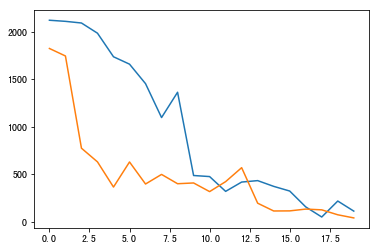

In [117]:
labels_true = []
param = {'min_samples_leaf':range(2, 11, 1),'max_leaf_nodes':range(11,21,1)}
for i in range(len(features_tr)):
    reg = DecisionTreeRegressor(random_state=0,max_depth=5)
    grid = GridSearchCV(estimator = reg, param_grid = param, scoring = make_scorer(mean_squared_error),
                       n_jobs = -1, cv = 3, verbose = 1)
    grid.fit(features_tr[i], labels_tr[i])
    pred = grid.predict(features_te[i])
    labels_true.append(pred)
    print('最好的参数为:{}'.format(grid.best_params_))
    print('最好的MSE值为:{}'.format(grid.best_score_))
plt.plot(labels_true)
plt.plot(labels_te)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=10, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=2,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')


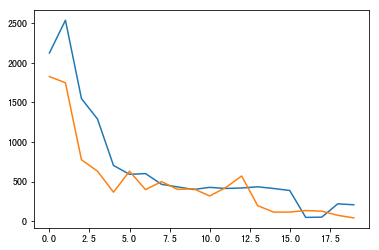

In [124]:
labels_true = []
for i in range(len(features_tr)):
    reg = DecisionTreeRegressor(random_state=0,max_depth=3,min_samples_leaf=2,max_leaf_nodes=10)
    reg.fit(features_tr[i], labels_tr[i])
    pred = reg.predict(features_te[i])
    labels_true.append(pred)

plt.plot(labels_true)
plt.plot(labels_te)
print(reg)

In [125]:
# TODO：模型评价
from sklearn.metrics import r2_score
print('测试集上的R方是:{}'.format(r2_score(labels_te, labels_true)))

测试集上的R方是:0.5145909171781027


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.0s finished


最好的参数为:{'n_estimators': 80}
最好的MSE值为:1019012.4691547542
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.9s finished


最好的参数为:{'n_estimators': 90}
最好的MSE值为:929787.3498829732
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.0s finished


最好的参数为:{'n_estimators': 50}
最好的MSE值为:993590.8176183673
Fitting 3 folds for each of 10 candidates, totalling 30 fits
最好的参数为:{'n_estimators': 80}
最好的MSE值为:848146.4616539062
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.9s finished


最好的参数为:{'n_estimators': 80}
最好的MSE值为:849780.9212545954
Fitting 3 folds for each of 10 candidates, totalling 30 fits
最好的参数为:{'n_estimators': 10}
最好的MSE值为:972302.7092307693
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.9s finished


最好的参数为:{'n_estimators': 10}
最好的MSE值为:985937.131745283
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.0s finished


最好的参数为:{'n_estimators': 10}
最好的MSE值为:952668.1879629631
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.0s finished


最好的参数为:{'n_estimators': 10}
最好的MSE值为:866275.6267727275
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.0s finished


最好的参数为:{'n_estimators': 10}
最好的MSE值为:911001.5139732143
Fitting 3 folds for each of 10 candidates, totalling 30 fits
最好的参数为:{'n_estimators': 10}
最好的MSE值为:1013371.1537280702
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.1s finished


最好的参数为:{'n_estimators': 30}
最好的MSE值为:911248.5895641764
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.2s finished


最好的参数为:{'n_estimators': 10}
最好的MSE值为:1060035.9327542374
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.1s finished


最好的参数为:{'n_estimators': 10}
最好的MSE值为:1021310.5577083334
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.2s finished


最好的参数为:{'n_estimators': 20}
最好的MSE值为:1072842.6276639346
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.3s finished


最好的参数为:{'n_estimators': 10}
最好的MSE值为:1045127.5661290322
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.5s finished


最好的参数为:{'n_estimators': 30}
最好的MSE值为:1076360.1157363318
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.1s finished


最好的参数为:{'n_estimators': 10}
最好的MSE值为:1458335.44390625
Fitting 3 folds for each of 10 candidates, totalling 30 fits
最好的参数为:{'n_estimators': 30}
最好的MSE值为:1887824.1509700853
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.1s finished


最好的参数为:{'n_estimators': 10}
最好的MSE值为:1886001.7145454546


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.0s finished


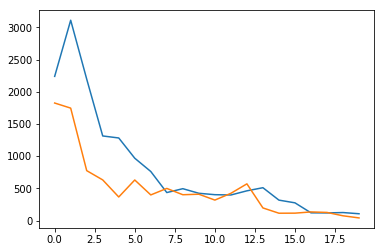

In [119]:
# 随机森林模型
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error
labels_true = []
param = {'n_estimators':range(10, 101, 10)}
for i in range(len(features_tr)):
    reg = RandomForestRegressor(random_state=0)
    grid = GridSearchCV(estimator = reg, param_grid = param, scoring = make_scorer(mean_squared_error),
                       n_jobs = -1, cv = 3, verbose = 1)
    grid.fit(features_tr[i], labels_tr[i])
    pred = grid.predict(features_te[i])
    labels_true.append(pred)
    print('最好的参数为:{}'.format(grid.best_params_))
    print('最好的MSE值为:{}'.format(grid.best_score_))
plt.plot(labels_true)
plt.plot(labels_te)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)


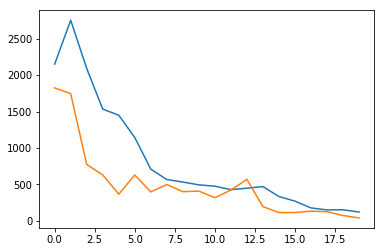

In [131]:
labels_true = []
for i in range(len(features_tr)):
    reg = RandomForestRegressor(random_state=0,max_depth=7,n_estimators=100,min_samples_leaf=2)
    reg.fit(features_tr[i], labels_tr[i])
    pred = reg.predict(features_te[i])
    labels_true.append(pred)

plt.plot(labels_true)
plt.plot(labels_te)
print(reg)

In [132]:
# TODO：模型评价
from sklearn.metrics import r2_score
print('测试集上的R方是:{}'.format(r2_score(labels_te, labels_true)))

测试集上的R方是:-0.19351788079763388
